# Explore done / active kerastuner run

In [12]:
from pathlib import Path
import pandas as pd
import json
import os
os.listdir(Path('..') / 'hyper_search_6_5')

['efficientnet_b0_128x128',
 'efficientnet_b0_160x100',
 'efficientnet_b0_160x160',
 'efficientnet_b0_224x224',
 'efficientnet_b0_224x224_crop',
 'efficientnet_b0_240x160']

In [13]:
os.path.abspath("../results/" + str(6) + "." + str(5) + "/")

'/data/programming/immortar-cv/Vision/results/6.5'

In [35]:
root_dir = Path('..')
hyper_search_name = 'efficientnet_b0_240x160'
data_dir = root_dir / 'hyper_search_6_7' / hyper_search_name
list(data_dir.glob('*/trial.json'))

data = []
for trial_path in data_dir.glob('*/trial.json'):
    with open(trial_path, 'r') as rf:
        as_dict = json.load(rf)
        data.append({metric: min(val['observations'][0]['value']) for metric, val in as_dict['metrics']['metrics'].items()})
        data[-1].update(as_dict['hyperparameters']['values'])
        data[-1]['trial_id'] = as_dict['trial_id']
        data[-1]['main_loss'] = as_dict['score']
    
df = pd.DataFrame(data).set_index('trial_id').sort_values('main_loss')
df.head(10)

,loss,mae,mse,weighted_MAE,outside,val_loss,val_mae,val_mse,val_weighted_MAE,val_outside,...,dropout_1,dropout_2,dropout_3,initial_lr,tuner/epochs,tuner/initial_epoch,tuner/bracket,tuner/round,tuner/trial_id,main_loss
trial_id,,,,,,,,,,,,,,,,,,,,,
82728f6ad12bf0c76d0fc0f1282ec642,2.816712,2.816712,13.685090,1.219452,1.219452,3.597923,3.597923,22.126831,1.883868,1.883868,...,0.248987,0.160609,0.089473,0.008857,60,0,0,0,NaN,1.883868
06665d744e9aa204a66e82bb07373d49,2.867217,2.867217,13.867003,1.225925,1.225925,3.628901,3.628901,23.078558,1.910796,1.910796,...,0.339159,0.051512,0.001828,0.008076,60,15,1,1,9da3f13e3cfc53eda84c227a8142d068,1.910796
7b61a55550b205306889e456ea9a2037,3.075768,3.075768,16.524611,1.440963,1.440963,3.684413,3.684413,24.220602,1.954505,1.954505,...,0.362484,0.206586,0.103391,0.005851,60,15,1,1,7b9f645426039c3e4c26490d72a47926,1.954505
126145e31dc1d87876a7fe567ea0e887,3.177827,3.177827,17.644154,1.538728,1.538728,3.687420,3.687420,24.879004,2.039763,2.039763,...,0.438030,0.047038,0.077377,0.011542,60,15,1,1,a2129c8d4aea49e885a7abc141bca552,2.039763
80c0cc0dbc7879e11f08e17a39304338,3.140468,3.140468,16.955868,1.497877,1.497877,3.714270,3.714270,24.063158,2.044567,2.044567,...,0.072082,0.057385,0.211458,0.013713,60,0,0,0,NaN,2.044567
6c99060a70d8c4f1bd2904f976e91324,3.904247,3.904247,25.525782,2.231124,2.231124,3.749723,3.749723,26.086143,2.067194,2.067194,...,0.069019,0.274679,0.244169,0.056614,4,0,2,0,NaN,2.067194
de569ace8eeb10dfd00838ecfb99bb0d,3.252840,3.252840,18.158216,1.590812,1.590812,3.743156,3.743156,25.063488,2.074885,2.074885,...,0.047311,0.246891,0.049127,0.018862,15,0,1,0,NaN,2.074885
217701de3b46b3a9bfd546b162dce0f6,3.072846,3.072846,16.496181,1.449918,1.449918,3.745411,3.745411,24.572247,2.086611,2.086611,...,0.433455,0.212582,0.028018,0.007933,60,0,0,0,NaN,2.086611
b087f30cf7a37f6ee00304f97da20658,3.065697,3.065697,16.095650,1.417383,1.417383,3.786778,3.786778,24.885651,2.090769,2.090769,...,0.062588,0.253341,0.028771,0.073969,60,0,0,0,NaN,2.090769


In [36]:
df.describe()

,loss,mae,mse,weighted_MAE,outside,val_loss,val_mae,val_mse,val_weighted_MAE,val_outside,dropout_0,dropout_1,dropout_2,dropout_3,initial_lr,tuner/epochs,tuner/initial_epoch,tuner/bracket,tuner/round,main_loss
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,3.881103,3.881103,25.505633,2.263125,2.263125,4.308865,4.308865,32.635316,2.726979,2.726979,0.210366,0.213040,0.212588,0.185435,0.026889,17.681818,1.909091,1.590909,0.272727,2.726979
std,0.566853,0.566853,7.235447,0.662941,0.662941,0.561874,0.561874,7.807878,0.680523,0.680523,0.120269,0.127546,0.134293,0.120711,0.019921,20.608424,4.374553,0.653289,0.539874,0.680523
min,2.816712,2.816712,13.685090,1.219452,1.219452,3.597923,3.597923,22.126831,1.883868,1.883868,0.007260,0.000534,0.001250,0.001828,0.005042,4.000000,0.000000,0.000000,0.000000,1.883868
25%,3.453548,3.453548,20.049438,1.749923,1.749923,3.950866,3.950866,28.153189,2.326055,2.326055,0.102437,0.097882,0.097107,0.077377,0.011492,4.000000,0.000000,1.000000,0.000000,2.326055
50%,3.868123,3.868123,24.748013,2.159067,2.159067,4.128889,4.128889,30.299222,2.484423,2.484423,0.198061,0.203988,0.225632,0.182737,0.020992,9.500000,0.000000,2.000000,0.000000,2.484423
75%,4.178216,4.178216,28.814054,2.558042,2.558042,4.414796,4.414796,33.628822,2.837524,2.837524,0.299863,0.311509,0.301581,0.248029,0.041551,15.000000,0.000000,2.000000,0.000000,2.837524
max,5.432756,5.432756,47.608898,4.218539,4.218539,6.065353,6.065353,56.910900,4.857080,4.857080,0.449169,0.447995,0.449270,0.448099,0.079660,60.000000,15.000000,2.000000,2.000000,4.857080


In [37]:
print(df.iloc[0])

loss                      2.81671
mae                       2.81671
mse                       13.6851
weighted_MAE              1.21945
outside                   1.21945
val_loss                  3.59792
val_mae                   3.59792
val_mse                   22.1268
val_weighted_MAE          1.88387
val_outside               1.88387
dropout_0                0.121714
dropout_1                0.248987
dropout_2                0.160609
dropout_3               0.0894728
initial_lr             0.00885744
tuner/epochs                   60
tuner/initial_epoch             0
tuner/bracket                   0
tuner/round                     0
tuner/trial_id                NaN
main_loss                 1.88387
Name: 82728f6ad12bf0c76d0fc0f1282ec642, dtype: object


In [38]:
print(df.iloc[1])

loss                                            2.86722
mae                                             2.86722
mse                                              13.867
weighted_MAE                                    1.22592
outside                                         1.22592
val_loss                                         3.6289
val_mae                                          3.6289
val_mse                                         23.0786
val_weighted_MAE                                 1.9108
val_outside                                      1.9108
dropout_0                                     0.0954912
dropout_1                                      0.339159
dropout_2                                     0.0515121
dropout_3                                     0.0018282
initial_lr                                   0.00807595
tuner/epochs                                         60
tuner/initial_epoch                                  15
tuner/bracket                                   

In [39]:
print(df.iloc[2])

loss                                            3.07577
mae                                             3.07577
mse                                             16.5246
weighted_MAE                                    1.44096
outside                                         1.44096
val_loss                                        3.68441
val_mae                                         3.68441
val_mse                                         24.2206
val_weighted_MAE                                 1.9545
val_outside                                      1.9545
dropout_0                                      0.121305
dropout_1                                      0.362484
dropout_2                                      0.206586
dropout_3                                      0.103391
initial_lr                                    0.0058508
tuner/epochs                                         60
tuner/initial_epoch                                  15
tuner/bracket                                   

In [40]:
df.columns

Index(['loss', 'mae', 'mse', 'weighted_MAE', 'outside', 'val_loss', 'val_mae',
       'val_mse', 'val_weighted_MAE', 'val_outside', 'dropout_0', 'dropout_1',
       'dropout_2', 'dropout_3', 'initial_lr', 'tuner/epochs',
       'tuner/initial_epoch', 'tuner/bracket', 'tuner/round', 'tuner/trial_id',
       'main_loss'],
      dtype='object')

KeyError: 'dense_repetition'

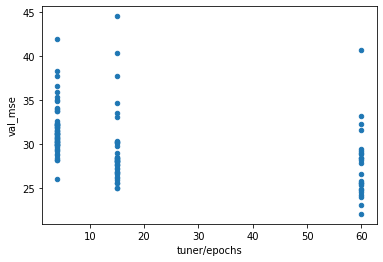

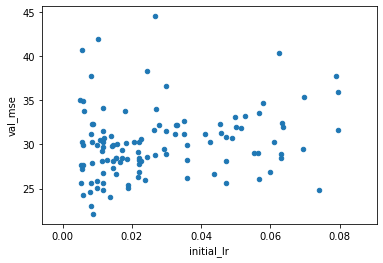

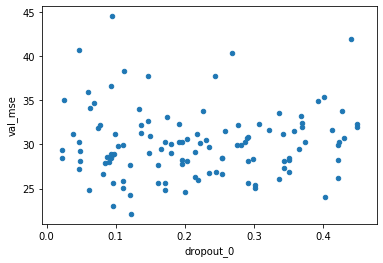

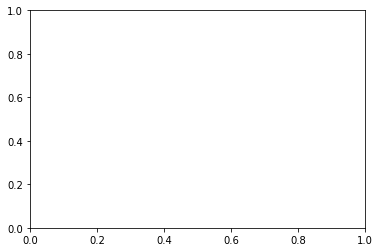

In [41]:
cols = ['tuner/epochs', 'initial_lr', 'dropout_0', 'dense_repetition']
for col in cols:
    df.loc[df.main_loss < df.main_loss.min() * 2].plot.scatter(x=col, y='val_mse')

In [11]:
import os
save_folder = "../results/" + str(6) + "." + str(5) + "/"
os.listdir(save_folder)

['efficientnet_b0_128x128',
 'efficientnet_b0_128x128_div_factor_1.0.png',
 'efficientnet_b0_128x128_div_factor_1.0.txt',
 'efficientnet_b0_160x100',
 'efficientnet_b0_160x100_div_factor_1.0.png',
 'efficientnet_b0_160x100_div_factor_1.0.txt',
 'efficientnet_b0_160x160',
 'efficientnet_b0_160x160_div_factor_1.0.png',
 'efficientnet_b0_160x160_div_factor_1.0.txt',
 'efficientnet_b0_224x224',
 'efficientnet_b0_224x224_div_factor_1.0.png',
 'efficientnet_b0_224x224_div_factor_1.0.txt',
 'efficientnet_b0_240x160',
 'efficientnet_b0_240x160_div_factor_1.0.png',
 'efficientnet_b0_240x160_div_factor_1.0.txt']

In [25]:
from tf_model_search_script import *

In [ ]:
with open("instructions.txt", "r") as f:
        lines = f.readlines()
    print(lines[0][:-1], lines[1][:-1], float(lines[2]))
    main(lines[1][:-1], float(lines[2]), lines[0][:-1] == "tune")

INFO:tensorflow:Reloading Oracle from existing project ../hyper_search_6_5/efficientnet_b0_240x160/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ../hyper_search_6_5/efficientnet_b0_240x160/oracle.json


INFO:tensorflow:Reloading Tuner from ../hyper_search_6_5/efficientnet_b0_240x160/tuner0.json


INFO:tensorflow:Reloading Tuner from ../hyper_search_6_5/efficientnet_b0_240x160/tuner0.json


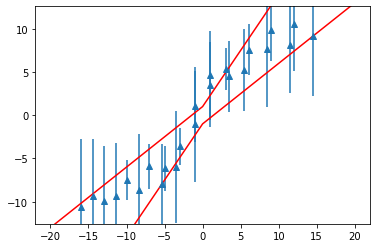

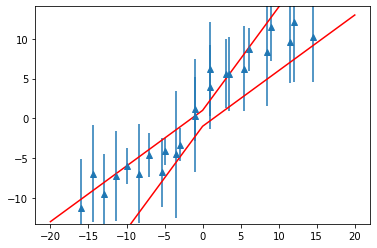

IndexError: list index out of range

In [29]:
save_folder = "../results/" + str(major_version) + "." + str(minor_version) + "/"
os.makedirs(save_folder, exist_ok=True)

model_name = 'efficientnet_b0_240x160'
model_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
input_size = (240, 160)
scale_size = (480, 270)
model_source = "tf_hub"

module = hub.KerasLayer(model_url)

RESIZE_TO_X, RESIZE_TO_Y = scale_size
CROP_TO_X, CROP_TO_Y = input_size

get_raw_dataset_mult = partial(get_raw_dataset, multuplier=1)

ds_train = get_raw_dataset(data_dir / 'train')
ds_val = get_raw_dataset(data_dir / 'valid')
ds_test = get_raw_dataset(data_dir / 'test')

pipeline_train = (ds_train
                  .shuffle(10000)
                  .repeat(int(SCHEDULE_LENGTH * BATCH_SIZE / DATASET_NUM_TRAIN_EXAMPLES * STEPS_PER_EPOCH) + 1 + 50)  # repeat dataset_size / num_steps
                  .map(partial(preprocess_train, scale_size=scale_size, input_size=input_size),
                       num_parallel_calls=16)
                  .batch(BATCH_SIZE)
                  .map(mixup, num_parallel_calls=8)
                  .map(cast_to_tuple)  # for keras model.fit
                  .prefetch(2))

pipeline_val = (ds_val.map(partial(preprocess_test, scale_size=scale_size, input_size=input_size),
                           num_parallel_calls=16)
                  .batch(BATCH_SIZE)
                  .map(cast_to_tuple)  # for keras model.fit
                  .cache()
                  .prefetch(2))

pipeline_test = (ds_test.map(partial(preprocess_test, scale_size=scale_size, input_size=input_size),
                             num_parallel_calls=16)
                  .batch(BATCH_SIZE)
                  .map(cast_to_tuple)  # for keras model.fit
                  .cache()
          .prefetch(2))

optimizer = tfa.optimizers.RectifiedAdam(learning_rate=0.008,
                                    beta_1=0.95,
                                    beta_2=0.99,
                                    epsilon=1e-6)
optimizer = tfa.optimizers.Lookahead(optimizer, sync_period=6, slow_step_size=0.5)
loss_fn = tf.keras.losses.MAE

tuner = kt.Hyperband(
    bit_tuning_model(module, input_size=input_size),
    objective=kt.Objective('val_weighted_MAE', direction='min'),
    hyperband_iterations=3,
    max_epochs=60,
    factor=4,
    directory=root_dir / f'hyper_search_{major_version}_{minor_version}',
    project_name=model_name,   # will continue in this folder => each run needs a new name
    overwrite=False,  # CAUTION!
)

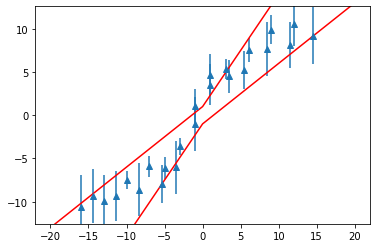

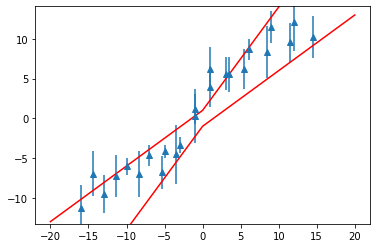

IndexError: list index out of range

In [30]:
results = eval_model(tuner.get_best_models(2)[0], pipeline_test, div_factor=1,
                     save=save_folder + model_name + "_res_0" + ".png",
                     samples=4 * np.sqrt(500 / (130 / 224 / 224 * input_size[0] * input_size[1]) / 4))

results = eval_model(tuner.get_best_models(2)[1], pipeline_test, div_factor=1,
                     save=save_folder + model_name + "_res_0" + ".png",
                     samples=4 * np.sqrt(500 / (130 / 224 / 224 * input_size[0] * input_size[1]) / 4))

results = eval_model(tuner.get_best_models(2)[2], pipeline_test, div_factor=1,
                     save=save_folder + model_name + "_res_0" + ".png",
                     samples=4 * np.sqrt(500 / (130 / 224 / 224 * input_size[0] * input_size[1]) / 4))

results = eval_model(tuner.get_best_models(2)[3], pipeline_test, div_factor=1,
                     save=save_folder + model_name + "_res_0" + ".png",
                     samples=4 * np.sqrt(500 / (130 / 224 / 224 * input_size[0] * input_size[1]) / 4))

In [34]:
!cd ../data/india && cp -v valid/* train/

'valid/-0.975_0099_0.jpg' -> 'train/-0.975_0099_0.jpg'
'valid/-0.975_0099_1.jpg' -> 'train/-0.975_0099_1.jpg'
'valid/-0.975_0099_10.jpg' -> 'train/-0.975_0099_10.jpg'
'valid/-0.975_0099_11.jpg' -> 'train/-0.975_0099_11.jpg'
'valid/-0.975_0099_12.jpg' -> 'train/-0.975_0099_12.jpg'
'valid/-0.975_0099_13.jpg' -> 'train/-0.975_0099_13.jpg'
'valid/-0.975_0099_14.jpg' -> 'train/-0.975_0099_14.jpg'
'valid/-0.975_0099_15.jpg' -> 'train/-0.975_0099_15.jpg'
'valid/-0.975_0099_16.jpg' -> 'train/-0.975_0099_16.jpg'
'valid/-0.975_0099_17.jpg' -> 'train/-0.975_0099_17.jpg'
'valid/-0.975_0099_18.jpg' -> 'train/-0.975_0099_18.jpg'
'valid/-0.975_0099_19.jpg' -> 'train/-0.975_0099_19.jpg'
'valid/-0.975_0099_2.jpg' -> 'train/-0.975_0099_2.jpg'
'valid/-0.975_0099_20.jpg' -> 'train/-0.975_0099_20.jpg'
'valid/-0.975_0099_21.jpg' -> 'train/-0.975_0099_21.jpg'
'valid/-0.975_0099_22.jpg' -> 'train/-0.975_0099_22.jpg'
'valid/-0.975_0099_23.jpg' -> 'train/-0.975_0099_23.jpg'
'valid/-0.975_0099_24.jpg' -> 'train/

'valid/-1.0_0075_88.jpg' -> 'train/-1.0_0075_88.jpg'
'valid/-1.0_0075_89.jpg' -> 'train/-1.0_0075_89.jpg'
'valid/-1.0_0075_9.jpg' -> 'train/-1.0_0075_9.jpg'
'valid/-1.0_0075_90.jpg' -> 'train/-1.0_0075_90.jpg'
'valid/-1.0_0075_91.jpg' -> 'train/-1.0_0075_91.jpg'
'valid/-1.0_0075_92.jpg' -> 'train/-1.0_0075_92.jpg'
'valid/-1.0_0075_93.jpg' -> 'train/-1.0_0075_93.jpg'
'valid/-1.0_0075_94.jpg' -> 'train/-1.0_0075_94.jpg'
'valid/-1.0_0075_95.jpg' -> 'train/-1.0_0075_95.jpg'
'valid/-1.0_0075_96.jpg' -> 'train/-1.0_0075_96.jpg'
'valid/-1.0_0075_97.jpg' -> 'train/-1.0_0075_97.jpg'
'valid/-1.0_0075_98.jpg' -> 'train/-1.0_0075_98.jpg'
'valid/-1.0_0075_99.jpg' -> 'train/-1.0_0075_99.jpg'
'valid/-11.415_0071_0.jpg' -> 'train/-11.415_0071_0.jpg'
'valid/-11.415_0071_1.jpg' -> 'train/-11.415_0071_1.jpg'
'valid/-11.415_0071_10.jpg' -> 'train/-11.415_0071_10.jpg'
'valid/-11.415_0071_11.jpg' -> 'train/-11.415_0071_11.jpg'
'valid/-11.415_0071_12.jpg' -> 'train/-11.415_0071_12.jpg'
'valid/-11.415_0071_13

'valid/-12.99_0094_72.jpg' -> 'train/-12.99_0094_72.jpg'
'valid/-12.99_0094_73.jpg' -> 'train/-12.99_0094_73.jpg'
'valid/-12.99_0094_74.jpg' -> 'train/-12.99_0094_74.jpg'
'valid/-12.99_0094_75.jpg' -> 'train/-12.99_0094_75.jpg'
'valid/-12.99_0094_76.jpg' -> 'train/-12.99_0094_76.jpg'
'valid/-12.99_0094_77.jpg' -> 'train/-12.99_0094_77.jpg'
'valid/-12.99_0094_78.jpg' -> 'train/-12.99_0094_78.jpg'
'valid/-12.99_0094_79.jpg' -> 'train/-12.99_0094_79.jpg'
'valid/-12.99_0094_8.jpg' -> 'train/-12.99_0094_8.jpg'
'valid/-12.99_0094_80.jpg' -> 'train/-12.99_0094_80.jpg'
'valid/-12.99_0094_81.jpg' -> 'train/-12.99_0094_81.jpg'
'valid/-12.99_0094_82.jpg' -> 'train/-12.99_0094_82.jpg'
'valid/-12.99_0094_83.jpg' -> 'train/-12.99_0094_83.jpg'
'valid/-12.99_0094_84.jpg' -> 'train/-12.99_0094_84.jpg'
'valid/-12.99_0094_85.jpg' -> 'train/-12.99_0094_85.jpg'
'valid/-12.99_0094_86.jpg' -> 'train/-12.99_0094_86.jpg'
'valid/-12.99_0094_87.jpg' -> 'train/-12.99_0094_87.jpg'
'valid/-12.99_0094_88.jpg' -> 'tr

'valid/-16.0_0093_52.jpg' -> 'train/-16.0_0093_52.jpg'
'valid/-16.0_0093_53.jpg' -> 'train/-16.0_0093_53.jpg'
'valid/-16.0_0093_54.jpg' -> 'train/-16.0_0093_54.jpg'
'valid/-16.0_0093_55.jpg' -> 'train/-16.0_0093_55.jpg'
'valid/-16.0_0093_56.jpg' -> 'train/-16.0_0093_56.jpg'
'valid/-16.0_0093_57.jpg' -> 'train/-16.0_0093_57.jpg'
'valid/-16.0_0093_58.jpg' -> 'train/-16.0_0093_58.jpg'
'valid/-16.0_0093_59.jpg' -> 'train/-16.0_0093_59.jpg'
'valid/-16.0_0093_6.jpg' -> 'train/-16.0_0093_6.jpg'
'valid/-16.0_0093_60.jpg' -> 'train/-16.0_0093_60.jpg'
'valid/-16.0_0093_61.jpg' -> 'train/-16.0_0093_61.jpg'
'valid/-16.0_0093_62.jpg' -> 'train/-16.0_0093_62.jpg'
'valid/-16.0_0093_63.jpg' -> 'train/-16.0_0093_63.jpg'
'valid/-16.0_0093_64.jpg' -> 'train/-16.0_0093_64.jpg'
'valid/-16.0_0093_65.jpg' -> 'train/-16.0_0093_65.jpg'
'valid/-16.0_0093_66.jpg' -> 'train/-16.0_0093_66.jpg'
'valid/-16.0_0093_67.jpg' -> 'train/-16.0_0093_67.jpg'
'valid/-16.0_0093_68.jpg' -> 'train/-16.0_0093_68.jpg'
'valid/-16.0

'valid/-3.5_0074_65.jpg' -> 'train/-3.5_0074_65.jpg'
'valid/-3.5_0074_66.jpg' -> 'train/-3.5_0074_66.jpg'
'valid/-3.5_0074_67.jpg' -> 'train/-3.5_0074_67.jpg'
'valid/-3.5_0074_68.jpg' -> 'train/-3.5_0074_68.jpg'
'valid/-3.5_0074_69.jpg' -> 'train/-3.5_0074_69.jpg'
'valid/-3.5_0074_7.jpg' -> 'train/-3.5_0074_7.jpg'
'valid/-3.5_0074_70.jpg' -> 'train/-3.5_0074_70.jpg'
'valid/-3.5_0074_71.jpg' -> 'train/-3.5_0074_71.jpg'
'valid/-3.5_0074_72.jpg' -> 'train/-3.5_0074_72.jpg'
'valid/-3.5_0074_73.jpg' -> 'train/-3.5_0074_73.jpg'
'valid/-3.5_0074_74.jpg' -> 'train/-3.5_0074_74.jpg'
'valid/-3.5_0074_75.jpg' -> 'train/-3.5_0074_75.jpg'
'valid/-3.5_0074_76.jpg' -> 'train/-3.5_0074_76.jpg'
'valid/-3.5_0074_77.jpg' -> 'train/-3.5_0074_77.jpg'
'valid/-3.5_0074_78.jpg' -> 'train/-3.5_0074_78.jpg'
'valid/-3.5_0074_79.jpg' -> 'train/-3.5_0074_79.jpg'
'valid/-3.5_0074_8.jpg' -> 'train/-3.5_0074_8.jpg'
'valid/-3.5_0074_80.jpg' -> 'train/-3.5_0074_80.jpg'
'valid/-3.5_0074_81.jpg' -> 'train/-3.5_0074_81.jp

'valid/-5.4_0073_46.jpg' -> 'train/-5.4_0073_46.jpg'
'valid/-5.4_0073_47.jpg' -> 'train/-5.4_0073_47.jpg'
'valid/-5.4_0073_48.jpg' -> 'train/-5.4_0073_48.jpg'
'valid/-5.4_0073_49.jpg' -> 'train/-5.4_0073_49.jpg'
'valid/-5.4_0073_5.jpg' -> 'train/-5.4_0073_5.jpg'
'valid/-5.4_0073_50.jpg' -> 'train/-5.4_0073_50.jpg'
'valid/-5.4_0073_51.jpg' -> 'train/-5.4_0073_51.jpg'
'valid/-5.4_0073_52.jpg' -> 'train/-5.4_0073_52.jpg'
'valid/-5.4_0073_53.jpg' -> 'train/-5.4_0073_53.jpg'
'valid/-5.4_0073_54.jpg' -> 'train/-5.4_0073_54.jpg'
'valid/-5.4_0073_55.jpg' -> 'train/-5.4_0073_55.jpg'
'valid/-5.4_0073_56.jpg' -> 'train/-5.4_0073_56.jpg'
'valid/-5.4_0073_57.jpg' -> 'train/-5.4_0073_57.jpg'
'valid/-5.4_0073_58.jpg' -> 'train/-5.4_0073_58.jpg'
'valid/-5.4_0073_59.jpg' -> 'train/-5.4_0073_59.jpg'
'valid/-5.4_0073_6.jpg' -> 'train/-5.4_0073_6.jpg'
'valid/-5.4_0073_60.jpg' -> 'train/-5.4_0073_60.jpg'
'valid/-5.4_0073_61.jpg' -> 'train/-5.4_0073_61.jpg'
'valid/-5.4_0073_62.jpg' -> 'train/-5.4_0073_62.jp

'valid/-8.4_0072_22.jpg' -> 'train/-8.4_0072_22.jpg'
'valid/-8.4_0072_23.jpg' -> 'train/-8.4_0072_23.jpg'
'valid/-8.4_0072_24.jpg' -> 'train/-8.4_0072_24.jpg'
'valid/-8.4_0072_25.jpg' -> 'train/-8.4_0072_25.jpg'
'valid/-8.4_0072_26.jpg' -> 'train/-8.4_0072_26.jpg'
'valid/-8.4_0072_27.jpg' -> 'train/-8.4_0072_27.jpg'
'valid/-8.4_0072_28.jpg' -> 'train/-8.4_0072_28.jpg'
'valid/-8.4_0072_29.jpg' -> 'train/-8.4_0072_29.jpg'
'valid/-8.4_0072_3.jpg' -> 'train/-8.4_0072_3.jpg'
'valid/-8.4_0072_30.jpg' -> 'train/-8.4_0072_30.jpg'
'valid/-8.4_0072_31.jpg' -> 'train/-8.4_0072_31.jpg'
'valid/-8.4_0072_32.jpg' -> 'train/-8.4_0072_32.jpg'
'valid/-8.4_0072_33.jpg' -> 'train/-8.4_0072_33.jpg'
'valid/-8.4_0072_34.jpg' -> 'train/-8.4_0072_34.jpg'
'valid/-8.4_0072_35.jpg' -> 'train/-8.4_0072_35.jpg'
'valid/-8.4_0072_36.jpg' -> 'train/-8.4_0072_36.jpg'
'valid/-8.4_0072_37.jpg' -> 'train/-8.4_0072_37.jpg'
'valid/-8.4_0072_38.jpg' -> 'train/-8.4_0072_38.jpg'
'valid/-8.4_0072_39.jpg' -> 'train/-8.4_0072_39.

'valid/-9.99_0095_79.jpg' -> 'train/-9.99_0095_79.jpg'
'valid/-9.99_0095_8.jpg' -> 'train/-9.99_0095_8.jpg'
'valid/-9.99_0095_80.jpg' -> 'train/-9.99_0095_80.jpg'
'valid/-9.99_0095_81.jpg' -> 'train/-9.99_0095_81.jpg'
'valid/-9.99_0095_82.jpg' -> 'train/-9.99_0095_82.jpg'
'valid/-9.99_0095_83.jpg' -> 'train/-9.99_0095_83.jpg'
'valid/-9.99_0095_84.jpg' -> 'train/-9.99_0095_84.jpg'
'valid/-9.99_0095_85.jpg' -> 'train/-9.99_0095_85.jpg'
'valid/-9.99_0095_86.jpg' -> 'train/-9.99_0095_86.jpg'
'valid/-9.99_0095_87.jpg' -> 'train/-9.99_0095_87.jpg'
'valid/-9.99_0095_88.jpg' -> 'train/-9.99_0095_88.jpg'
'valid/-9.99_0095_89.jpg' -> 'train/-9.99_0095_89.jpg'
'valid/-9.99_0095_9.jpg' -> 'train/-9.99_0095_9.jpg'
'valid/-9.99_0095_90.jpg' -> 'train/-9.99_0095_90.jpg'
'valid/-9.99_0095_91.jpg' -> 'train/-9.99_0095_91.jpg'
'valid/-9.99_0095_92.jpg' -> 'train/-9.99_0095_92.jpg'
'valid/-9.99_0095_93.jpg' -> 'train/-9.99_0095_93.jpg'
'valid/-9.99_0095_94.jpg' -> 'train/-9.99_0095_94.jpg'
'valid/-9.99_0

'valid/11.505_0080_14.jpg' -> 'train/11.505_0080_14.jpg'
'valid/11.505_0080_15.jpg' -> 'train/11.505_0080_15.jpg'
'valid/11.505_0080_16.jpg' -> 'train/11.505_0080_16.jpg'
'valid/11.505_0080_17.jpg' -> 'train/11.505_0080_17.jpg'
'valid/11.505_0080_18.jpg' -> 'train/11.505_0080_18.jpg'
'valid/11.505_0080_19.jpg' -> 'train/11.505_0080_19.jpg'
'valid/11.505_0080_2.jpg' -> 'train/11.505_0080_2.jpg'
'valid/11.505_0080_20.jpg' -> 'train/11.505_0080_20.jpg'
'valid/11.505_0080_21.jpg' -> 'train/11.505_0080_21.jpg'
'valid/11.505_0080_22.jpg' -> 'train/11.505_0080_22.jpg'
'valid/11.505_0080_23.jpg' -> 'train/11.505_0080_23.jpg'
'valid/11.505_0080_24.jpg' -> 'train/11.505_0080_24.jpg'
'valid/11.505_0080_25.jpg' -> 'train/11.505_0080_25.jpg'
'valid/11.505_0080_26.jpg' -> 'train/11.505_0080_26.jpg'
'valid/11.505_0080_27.jpg' -> 'train/11.505_0080_27.jpg'
'valid/11.505_0080_28.jpg' -> 'train/11.505_0080_28.jpg'
'valid/11.505_0080_29.jpg' -> 'train/11.505_0080_29.jpg'
'valid/11.505_0080_3.jpg' -> 'tra

'valid/14.515_0081_18.jpg' -> 'train/14.515_0081_18.jpg'
'valid/14.515_0081_19.jpg' -> 'train/14.515_0081_19.jpg'
'valid/14.515_0081_2.jpg' -> 'train/14.515_0081_2.jpg'
'valid/14.515_0081_20.jpg' -> 'train/14.515_0081_20.jpg'
'valid/14.515_0081_21.jpg' -> 'train/14.515_0081_21.jpg'
'valid/14.515_0081_22.jpg' -> 'train/14.515_0081_22.jpg'
'valid/14.515_0081_23.jpg' -> 'train/14.515_0081_23.jpg'
'valid/14.515_0081_24.jpg' -> 'train/14.515_0081_24.jpg'
'valid/14.515_0081_25.jpg' -> 'train/14.515_0081_25.jpg'
'valid/14.515_0081_26.jpg' -> 'train/14.515_0081_26.jpg'
'valid/14.515_0081_27.jpg' -> 'train/14.515_0081_27.jpg'
'valid/14.515_0081_28.jpg' -> 'train/14.515_0081_28.jpg'
'valid/14.515_0081_29.jpg' -> 'train/14.515_0081_29.jpg'
'valid/14.515_0081_3.jpg' -> 'train/14.515_0081_3.jpg'
'valid/14.515_0081_30.jpg' -> 'train/14.515_0081_30.jpg'
'valid/14.515_0081_31.jpg' -> 'train/14.515_0081_31.jpg'
'valid/14.515_0081_32.jpg' -> 'train/14.515_0081_32.jpg'
'valid/14.515_0081_33.jpg' -> 'trai

'valid/3.5_0077_28.jpg' -> 'train/3.5_0077_28.jpg'
'valid/3.5_0077_29.jpg' -> 'train/3.5_0077_29.jpg'
'valid/3.5_0077_3.jpg' -> 'train/3.5_0077_3.jpg'
'valid/3.5_0077_30.jpg' -> 'train/3.5_0077_30.jpg'
'valid/3.5_0077_31.jpg' -> 'train/3.5_0077_31.jpg'
'valid/3.5_0077_32.jpg' -> 'train/3.5_0077_32.jpg'
'valid/3.5_0077_33.jpg' -> 'train/3.5_0077_33.jpg'
'valid/3.5_0077_34.jpg' -> 'train/3.5_0077_34.jpg'
'valid/3.5_0077_35.jpg' -> 'train/3.5_0077_35.jpg'
'valid/3.5_0077_36.jpg' -> 'train/3.5_0077_36.jpg'
'valid/3.5_0077_37.jpg' -> 'train/3.5_0077_37.jpg'
'valid/3.5_0077_38.jpg' -> 'train/3.5_0077_38.jpg'
'valid/3.5_0077_39.jpg' -> 'train/3.5_0077_39.jpg'
'valid/3.5_0077_4.jpg' -> 'train/3.5_0077_4.jpg'
'valid/3.5_0077_40.jpg' -> 'train/3.5_0077_40.jpg'
'valid/3.5_0077_41.jpg' -> 'train/3.5_0077_41.jpg'
'valid/3.5_0077_42.jpg' -> 'train/3.5_0077_42.jpg'
'valid/3.5_0077_43.jpg' -> 'train/3.5_0077_43.jpg'
'valid/3.5_0077_44.jpg' -> 'train/3.5_0077_44.jpg'
'valid/3.5_0077_45.jpg' -> 'train/3

'valid/6.05_0102_41.jpg' -> 'train/6.05_0102_41.jpg'
'valid/6.05_0102_42.jpg' -> 'train/6.05_0102_42.jpg'
'valid/6.05_0102_43.jpg' -> 'train/6.05_0102_43.jpg'
'valid/6.05_0102_44.jpg' -> 'train/6.05_0102_44.jpg'
'valid/6.05_0102_45.jpg' -> 'train/6.05_0102_45.jpg'
'valid/6.05_0102_46.jpg' -> 'train/6.05_0102_46.jpg'
'valid/6.05_0102_47.jpg' -> 'train/6.05_0102_47.jpg'
'valid/6.05_0102_48.jpg' -> 'train/6.05_0102_48.jpg'
'valid/6.05_0102_49.jpg' -> 'train/6.05_0102_49.jpg'
'valid/6.05_0102_5.jpg' -> 'train/6.05_0102_5.jpg'
'valid/6.05_0102_50.jpg' -> 'train/6.05_0102_50.jpg'
'valid/6.05_0102_51.jpg' -> 'train/6.05_0102_51.jpg'
'valid/6.05_0102_52.jpg' -> 'train/6.05_0102_52.jpg'
'valid/6.05_0102_53.jpg' -> 'train/6.05_0102_53.jpg'
'valid/6.05_0102_54.jpg' -> 'train/6.05_0102_54.jpg'
'valid/6.05_0102_55.jpg' -> 'train/6.05_0102_55.jpg'
'valid/6.05_0102_56.jpg' -> 'train/6.05_0102_56.jpg'
'valid/6.05_0102_57.jpg' -> 'train/6.05_0102_57.jpg'
'valid/6.05_0102_58.jpg' -> 'train/6.05_0102_58.

'valid/9.05_0103_35.jpg' -> 'train/9.05_0103_35.jpg'
'valid/9.05_0103_36.jpg' -> 'train/9.05_0103_36.jpg'
'valid/9.05_0103_37.jpg' -> 'train/9.05_0103_37.jpg'
'valid/9.05_0103_38.jpg' -> 'train/9.05_0103_38.jpg'
'valid/9.05_0103_39.jpg' -> 'train/9.05_0103_39.jpg'
'valid/9.05_0103_4.jpg' -> 'train/9.05_0103_4.jpg'
'valid/9.05_0103_40.jpg' -> 'train/9.05_0103_40.jpg'
'valid/9.05_0103_41.jpg' -> 'train/9.05_0103_41.jpg'
'valid/9.05_0103_42.jpg' -> 'train/9.05_0103_42.jpg'
'valid/9.05_0103_43.jpg' -> 'train/9.05_0103_43.jpg'
'valid/9.05_0103_44.jpg' -> 'train/9.05_0103_44.jpg'
'valid/9.05_0103_45.jpg' -> 'train/9.05_0103_45.jpg'
'valid/9.05_0103_46.jpg' -> 'train/9.05_0103_46.jpg'
'valid/9.05_0103_47.jpg' -> 'train/9.05_0103_47.jpg'
'valid/9.05_0103_48.jpg' -> 'train/9.05_0103_48.jpg'
'valid/9.05_0103_49.jpg' -> 'train/9.05_0103_49.jpg'
'valid/9.05_0103_5.jpg' -> 'train/9.05_0103_5.jpg'
'valid/9.05_0103_50.jpg' -> 'train/9.05_0103_50.jpg'
'valid/9.05_0103_51.jpg' -> 'train/9.05_0103_51.jp